In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from MachineLearning.KMeans import kmeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
x_train = np.loadtxt('MachineLearning/datasets/toydata.txt')

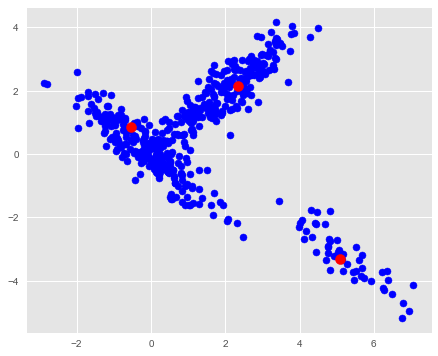

In [5]:
n_clusters = 3
c = kmeans.kmeans_plus2(x_train, n_clusters)
fig = plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(x_train[:, 0], x_train[:, 1], c='b')
plt.scatter(c[:, 0], c[:, 1], c='r', s=100)

[2763.5167390000001, 960.33959457009973, 692.10273274892575, 691.07469295097076, 690.79273876954494, 690.73517927177863, 690.711843549317]
[[ 2.37108187  2.33310526]
 [ 0.01318773  0.26946209]
 [ 5.10648077 -3.18840385]]


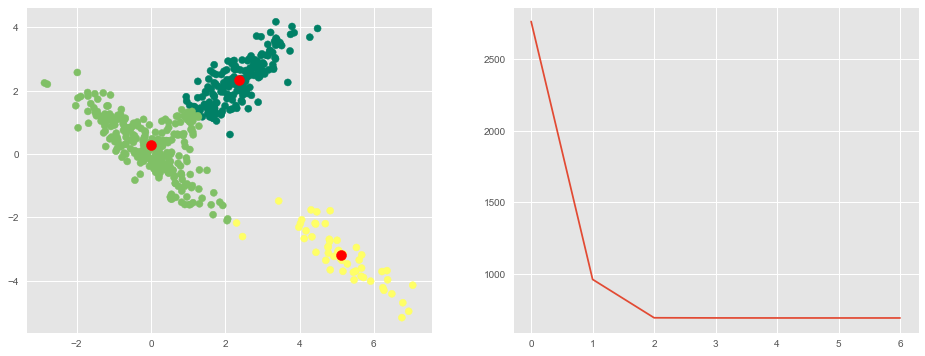

In [6]:
n_clusters = 3
c = kmeans.random_centroids(x_train, n_clusters)
distortion = []
while(1):
    pc = kmeans.assign_points(x_train, c)
    new_c = kmeans.update_centroids(x_train, pc[0], n_clusters)
    distortion.append(pc[1])
    if np.array_equal(c, new_c):
        break
    c = new_c
print(distortion)
print(c)
fig = plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(x_train[:, 0], x_train[:, 1], c=pc[0], cmap='summer')
plt.scatter(c[:, 0], c[:, 1], c='r', s=100)

plt.subplot(122)
plt.plot(range(len(distortion)), distortion)



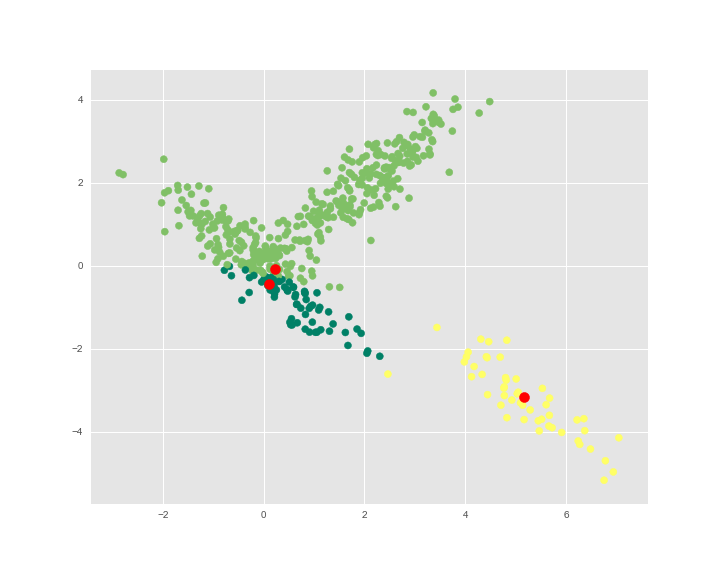
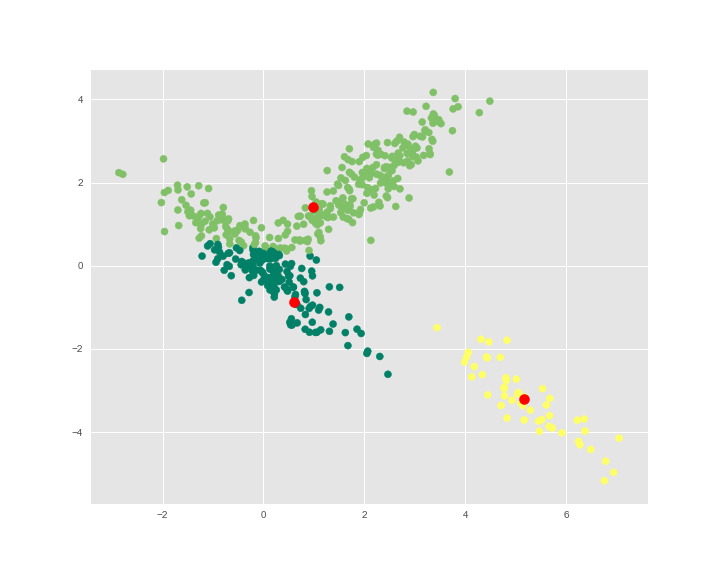
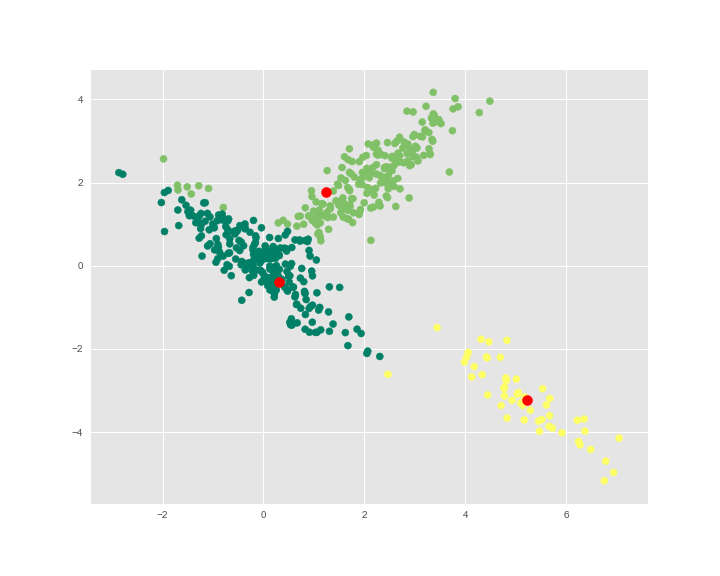
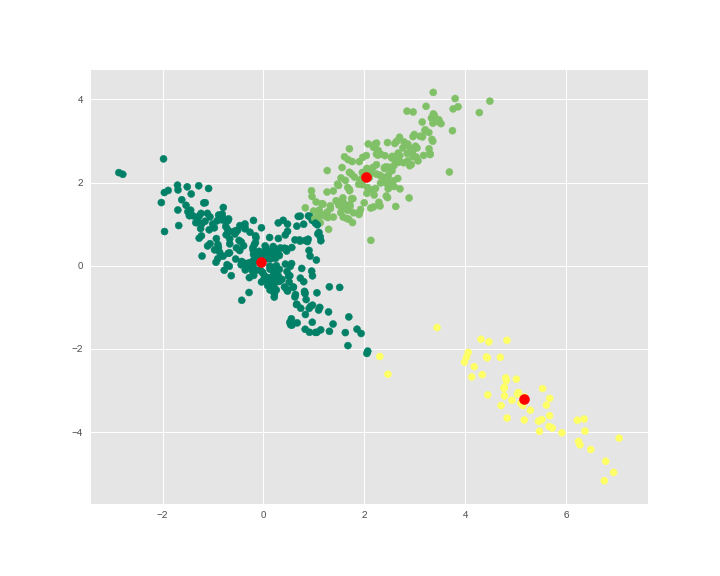
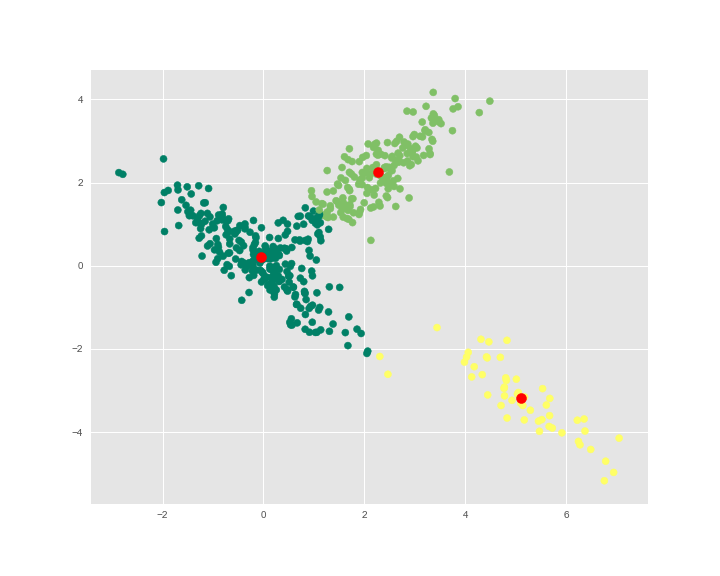
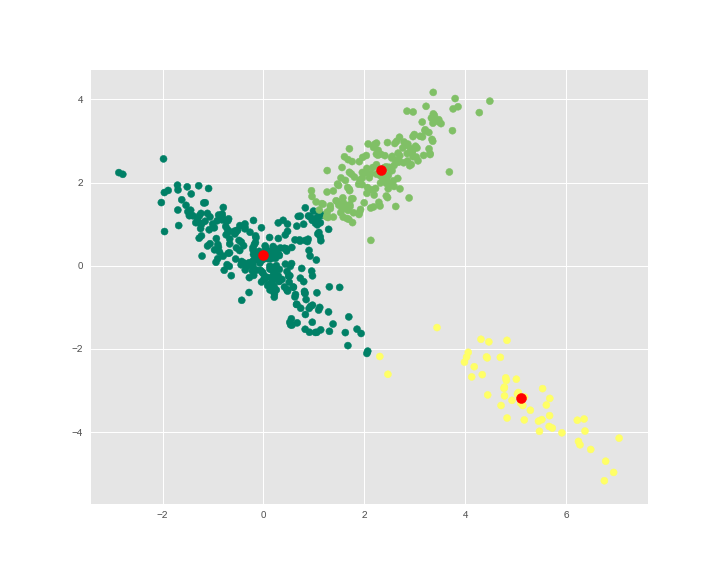
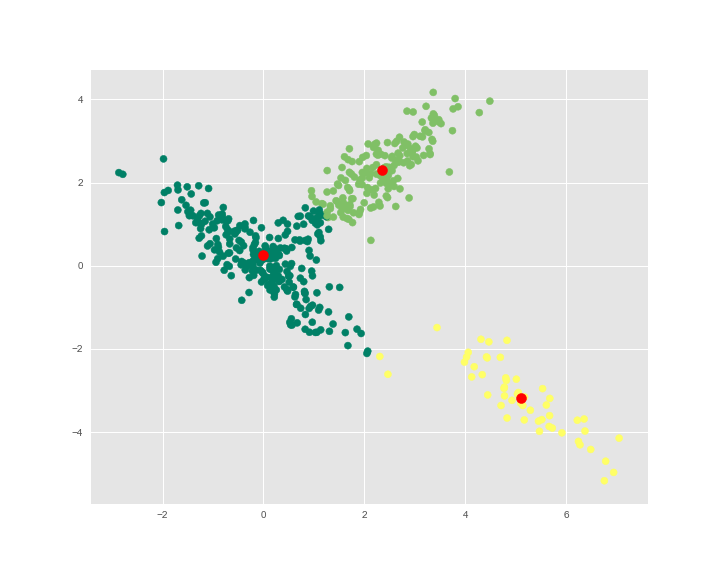
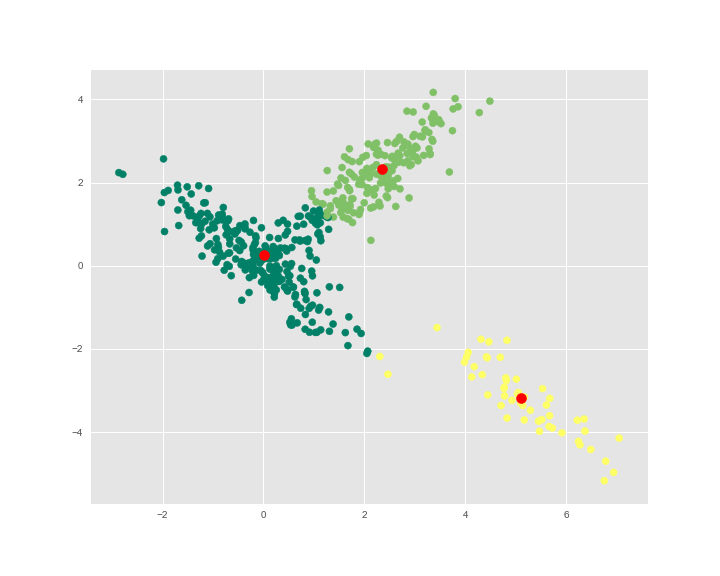
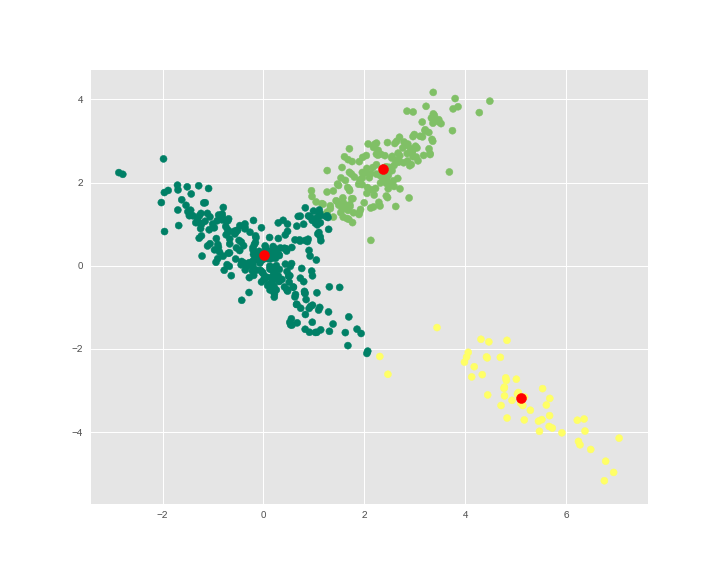
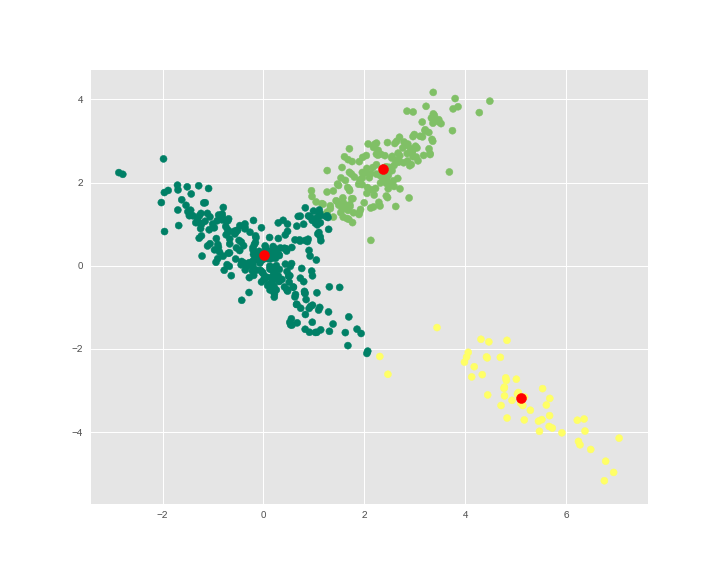
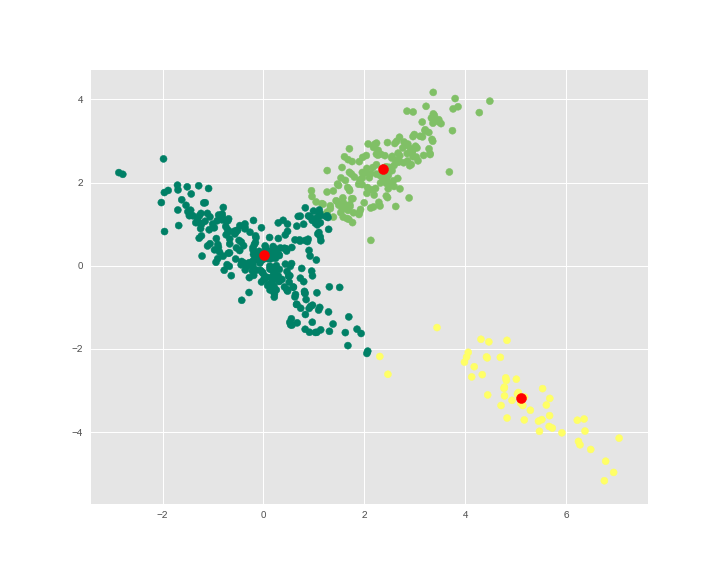
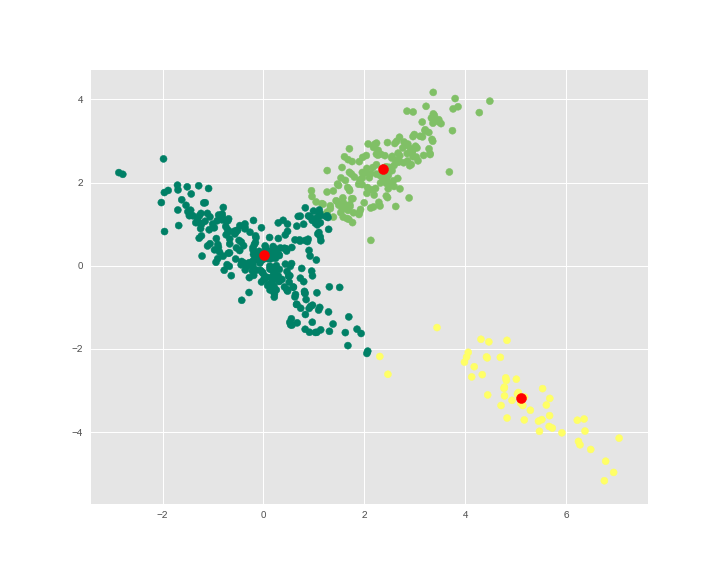
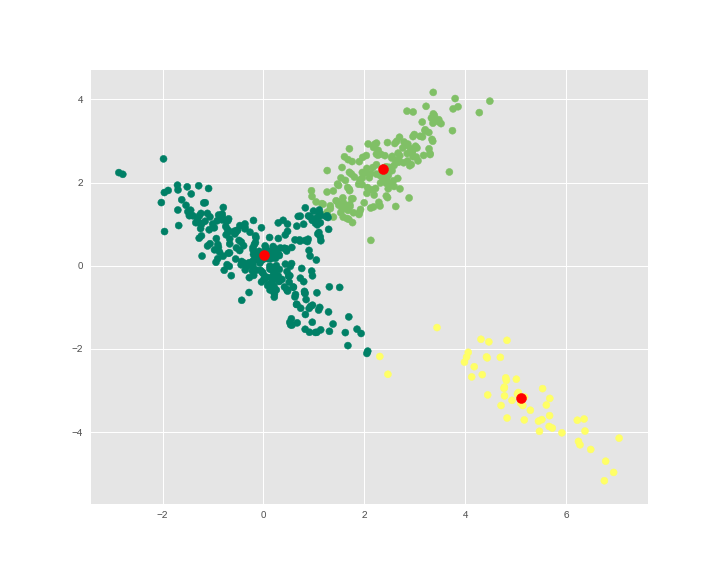
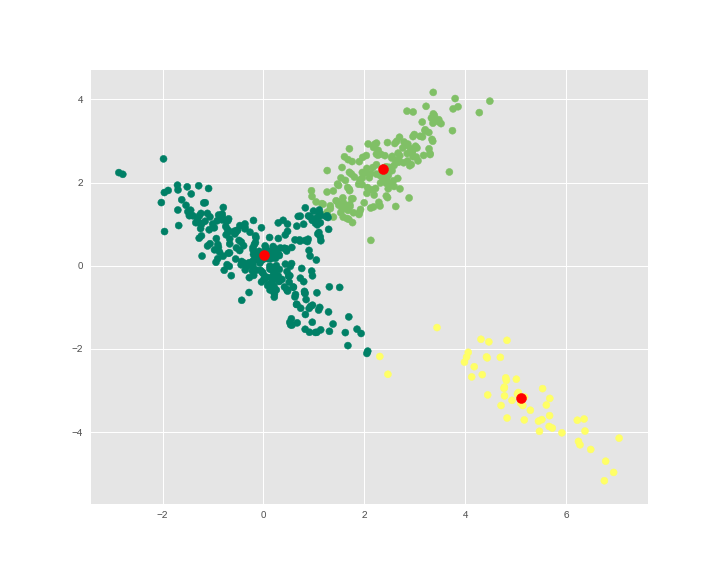
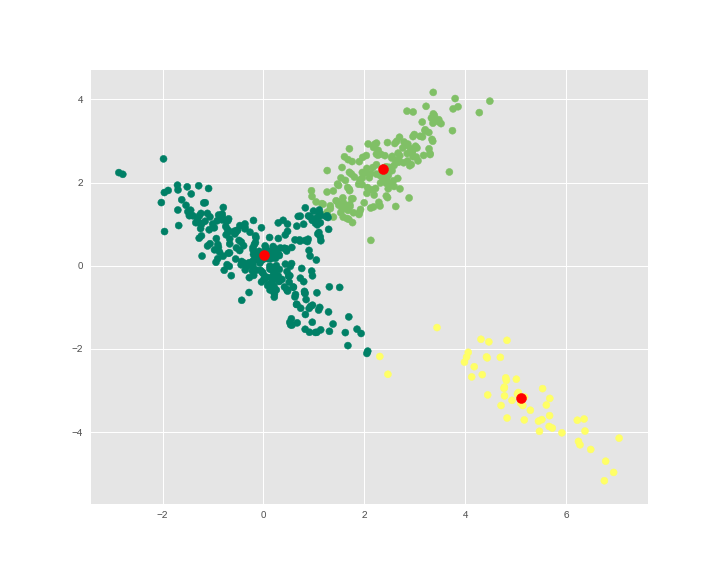
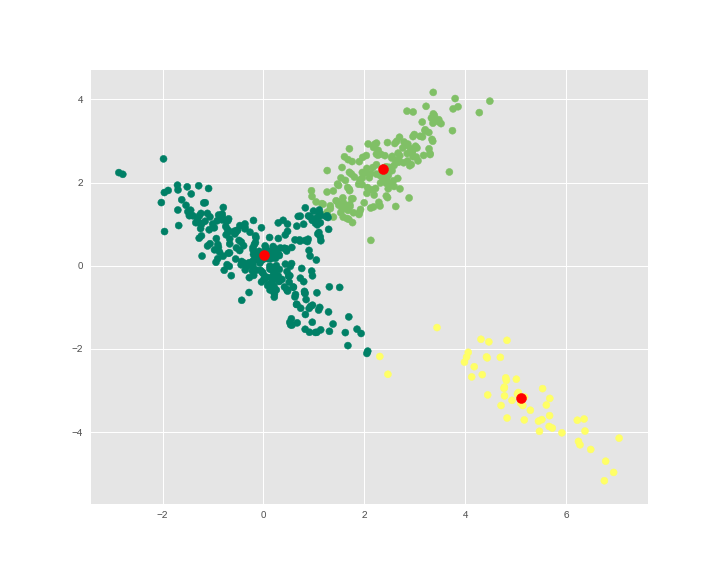
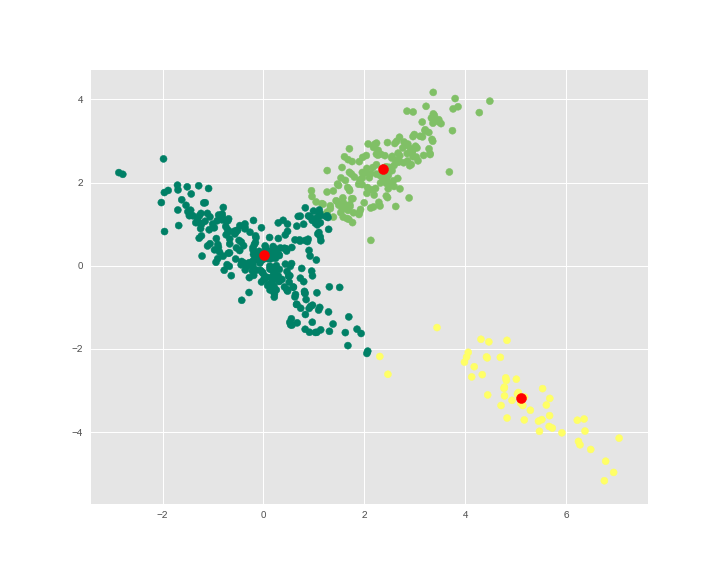
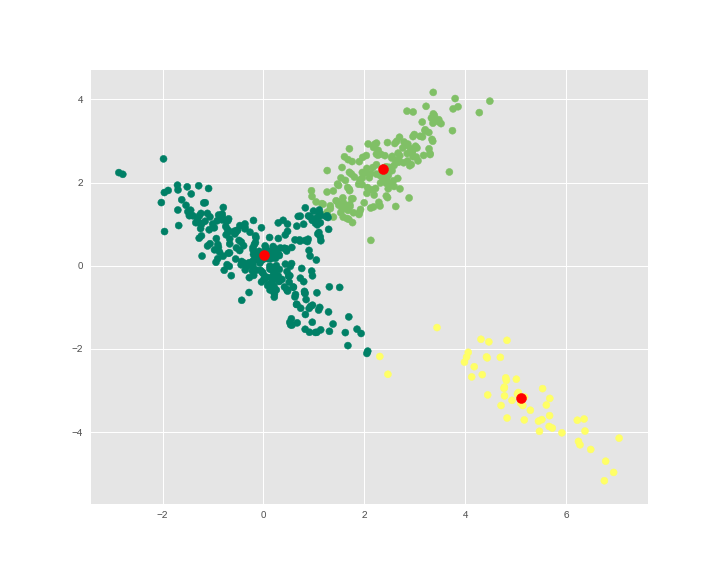
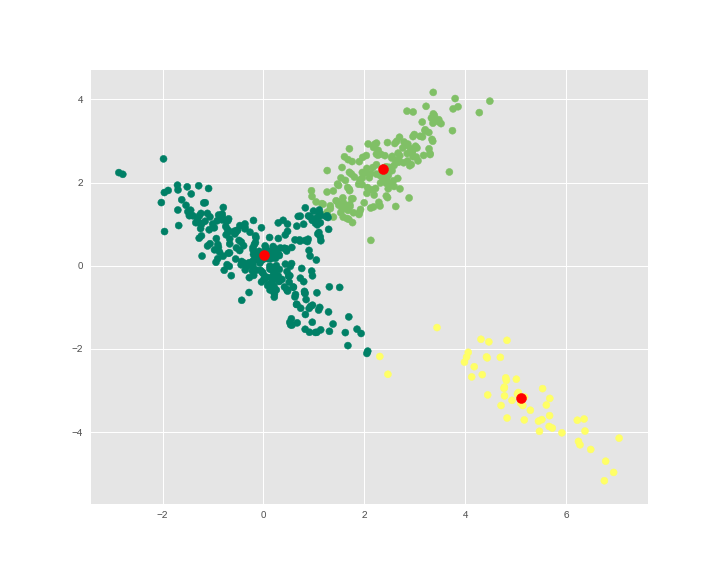
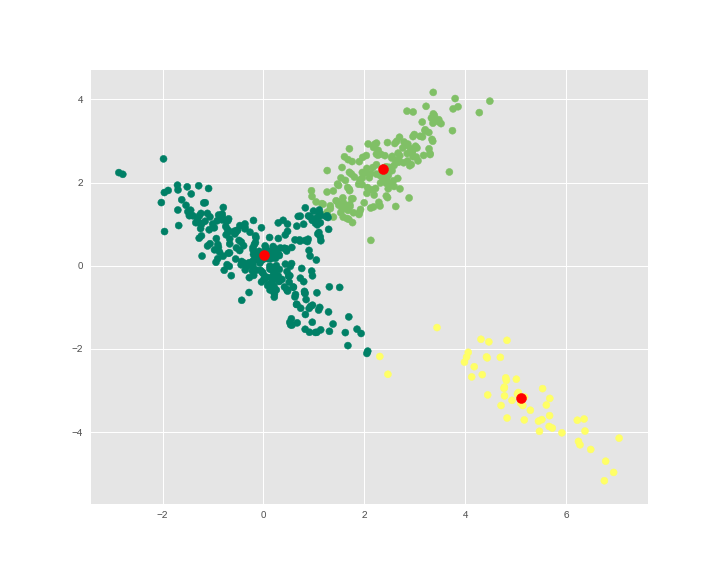

In [11]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure(figsize=(10,8))
ax = plt.axes(xlim=(-4, 8), ylim=(-4, 8))
scatter, = ax.plot([], [], lw=2)
n_clusters = 3
c = kmeans.random_centroids(x_train, n_clusters)

def init():
    scatter.set_data([], [])
    return scatter,

def animate(i):
    global c
    pc = kmeans.assign_points(x_train, c)
    ax.cla()
    ax.scatter(x_train[:, 0], x_train[:, 1], c=pc[0], cmap='summer')
    ax.scatter(c[:, 0], c[:, 1], c='r', s=100)
    c = kmeans.update_centroids(x_train, pc[0], n_clusters)
    return scatter,

animation.FuncAnimation(fig, animate, init_func=init, frames=20, interval=200, blit=True)

## Kmeans

In [12]:
KMeans = kmeans.KMeans(n_clusters=3, init_method='random')

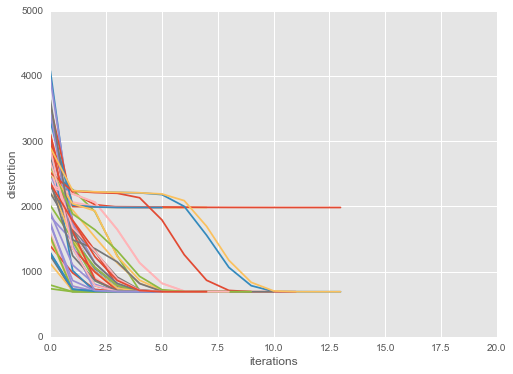

In [15]:
fig = plt.figure(figsize=(8,6))

for i in range(50):
    KMeans = kmeans.KMeans(n_clusters=3, init_method='random')
    y_hat = KMeans.fit(x_train)
    plt.plot(range(len(KMeans.distortion)), KMeans.distortion)

plt.xlabel('iterations')
plt.ylabel('distortion')
plt.ylim(0, 5000)
plt.xlim(0, 20)
plt.show()

## Kmeans ++

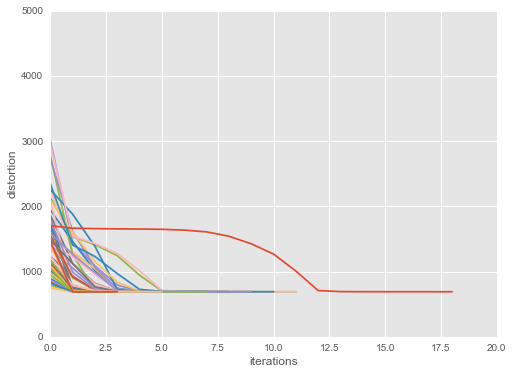

In [16]:
fig = plt.figure(figsize=(8,6))

for i in range(50):
    KMeans = kmeans.KMeans(n_clusters=3, init_method='kmeans++')
    y_hat = KMeans.fit(x_train)
    plt.plot(range(len(KMeans.distortion)), KMeans.distortion)

plt.xlabel('iterations')
plt.ylabel('distortion')
plt.ylim(0, 5000)
plt.xlim(0, 20)
plt.show()